In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv(r"C:\Users\acer\Desktop\Solar Power Plant Data.csv")
df.head()

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,01.01.2017-04:00,4.0,0,1003.1,-6.3,3.6,67,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date-Hour(NMT)       8760 non-null   object 
 1   WindSpeed            8760 non-null   float64
 2   Sunshine             8760 non-null   int64  
 3   AirPressure          8760 non-null   float64
 4   Radiation            8760 non-null   float64
 5   AirTemperature       8760 non-null   float64
 6   RelativeAirHumidity  8760 non-null   int64  
 7   SystemProduction     8760 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 547.6+ KB


In [5]:
df.describe()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2.639823,11.180479,1010.361781,97.538493,6.978893,76.719406,684.746071
std,1.628754,21.171295,12.793971,182.336029,7.604266,19.278996,1487.454665
min,0.000000,0.000000,965.900000,-9.300000,-12.400000,13.000000,0.000000
25%,1.400000,0.000000,1002.800000,-6.200000,0.500000,64.000000,0.000000
50%,2.300000,0.000000,1011.000000,-1.400000,6.400000,82.000000,0.000000
75%,3.600000,7.000000,1018.200000,115.600000,13.400000,93.000000,464.249950
max,10.900000,60.000000,1047.300000,899.700000,27.100000,100.000000,7701.000000


In [6]:
print("Missing values per column:\n", df.isna().sum())

Missing values per column:
 Date-Hour(NMT)         0
WindSpeed              0
Sunshine               0
AirPressure            0
Radiation              0
AirTemperature         0
RelativeAirHumidity    0
SystemProduction       0
dtype: int64


In [7]:
df.shape

(8760, 8)

In [8]:
df = df.drop(columns=['Date-Hour(NMT)'])

In [9]:
df.head()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,0.6,0,1003.8,-7.4,0.1,97,0.0
1,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,4.0,0,1003.1,-6.3,3.6,67,0.0


In [10]:
correlation_matrix = df.corr()

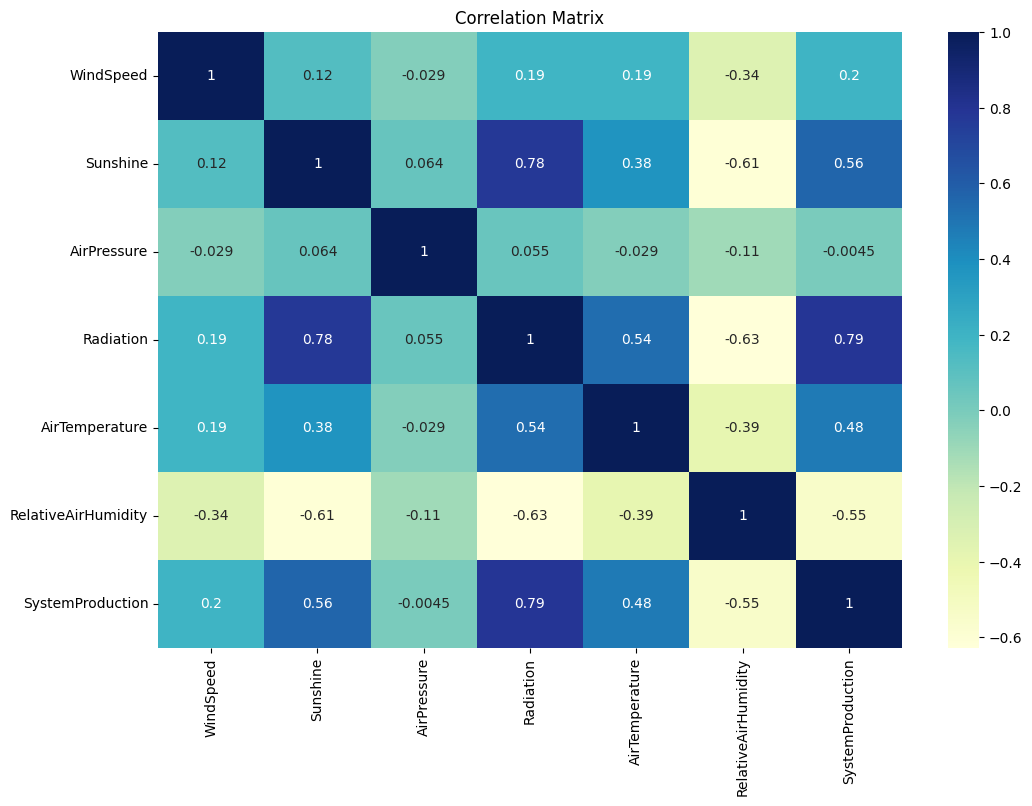

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)  
plt.title('Correlation Matrix')
plt.show()

In [12]:
threshold = 0.3


In [13]:
correlation_with_target = correlation_matrix['SystemProduction']
high_corr_features = correlation_with_target[(correlation_with_target) > threshold]

print("Features with high correlation to 'SystemProduction':")
print(high_corr_features)

Features with high correlation to 'SystemProduction':
Sunshine            0.564228
Radiation           0.785717
AirTemperature      0.480407
SystemProduction    1.000000
Name: SystemProduction, dtype: float64


In [14]:
X = df[['Radiation', 'Sunshine', 'AirTemperature']] 
y = df['SystemProduction']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape

(7008, 3)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([3.84606663e+02, 4.17701838e+03, 1.63935165e+03, ...,
       0.00000000e+00, 1.31999800e+00, 7.75528330e+02])

In [21]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest RMSE: {rmse_rf:.4f}")
print(f"Random Forest R-squared: {r2_rf:.4f}")

Random Forest RMSE: 874.3774
Random Forest R-squared: 0.6136


In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_rf = np.mean(np.sqrt(-cv_scores_rf))
print(f"Random Forest Cross-Validation RMSE: {cv_rmse_rf:.4f}")

Random Forest Cross-Validation RMSE: 919.2426


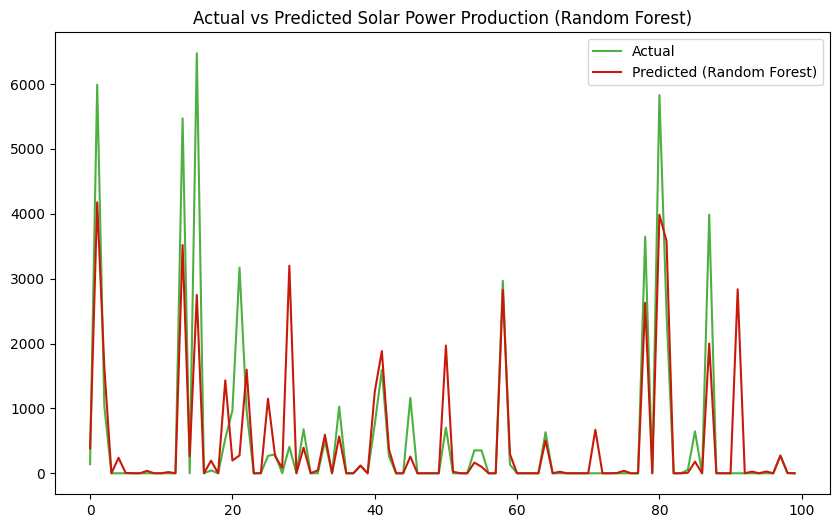

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Actual', color='#4CB140')
plt.plot(y_pred_rf[:100], label='Predicted (Random Forest)', color='#C9190B')
plt.title('Actual vs Predicted Solar Power Production (Random Forest)')
plt.legend()
plt.show()

In [25]:
import joblib

In [26]:
joblib.dump(rf_model, 'solar_power_prediction_model.pkl')

['solar_power_prediction_model.pkl']

In [27]:
# Custom Prediction Function
def predict_solar_power(radiation, sunshine, air_temp):
    # Create a dataframe for the input data
    input_data = pd.DataFrame({
        'Radiation': [radiation],
        'Sunshine': [sunshine],
        'AirTemperature': [air_temp]
    })
    
    # Scale the input data
    input_data_scaled = scaler.transform(input_data)
    
    # Make prediction
    prediction = rf_model.predict(input_data_scaled)
    return prediction[0]

In [28]:
result = predict_solar_power(650, 6, 32)
print(f"Predicted Solar Power Production: {result:.2f} kW")

Predicted Solar Power Production: 5759.62 kW


In [29]:
result = predict_solar_power(800, 8, 30)
print(f"Predicted Solar Power Production: {result:.2f} kW")

Predicted Solar Power Production: 6346.41 kW
